In [1]:
# Import necessary libraries
import numpy as np
import logging
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from typing import Tuple

# Configure logging
logging.basicConfig(level=logging.INFO)

In [2]:
# Define constants
IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
NUM_CLASSES = 10
EPOCHS = 5
BATCH_SIZE = 64

In [3]:
# Load and preprocess data
def load_and_preprocess_data() -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Load and preprocess the Fashion MNIST dataset.

    Returns:
        Tuple containing the training and test datasets: (X_train, y_train, X_test, y_test).
    """
    try:
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

        # Reshape data to fit the model (28x28 with 1 channel for grayscale)
        X_train = X_train.reshape(X_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)
        X_test = X_test.reshape(X_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH, 1)

        # Normalize pixel values from 0-255 to 0-1
        X_train, X_test = X_train / 255.0, X_test / 255.0

        # Convert labels to categorical (one-hot encoding)
        y_train = to_categorical(y_train, NUM_CLASSES)
        y_test = to_categorical(y_test, NUM_CLASSES)

        return X_train, y_train, X_test, y_test

    except Exception as e:
        logging.error(f"Error loading or preprocessing data: {e}")
        return None, None, None, None


In [4]:
# Build the CNN model
def build_model() -> Sequential:
    """
    Build and compile the CNN model.

    Returns:
        A compiled Sequential model.
    """
    model = Sequential()

    # Add Input layer and Conv2D layers
    model.add(InputLayer(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1)))  # Input layer to define the shape
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))  # First Conv2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  # First MaxPooling layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Second Conv2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Second MaxPooling layer
    model.add(Flatten())  # Flatten the data before passing to dense layers
    model.add(Dense(128, activation='relu'))  # Fully connected layer with 128 units
    model.add(Dense(NUM_CLASSES, activation='softmax'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [5]:
# Train the model
def train_model(model: Sequential, X_train: np.ndarray, y_train: np.ndarray) -> None:
    """
    Train the CNN model.

    Args:
        model: A compiled CNN model.
        X_train: Training data.
        y_train: Training labels.
    """
    try:
        model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)
        logging.info("Model training completed.")
    except Exception as e:
        logging.error(f"Error during model training: {e}")


In [6]:
# Evaluate the model
def evaluate_model(model: Sequential, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Evaluate the CNN model on test data.

    Args:
        model: A trained CNN model.
        X_test: Test data.
        y_test: Test labels.
    """
    try:
        test_loss, test_acc = model.evaluate(X_test, y_test)
        logging.info(f'Test accuracy: {test_acc}')
    except Exception as e:
        logging.error(f"Error during model evaluation: {e}")


In [7]:
# Make predictions and visualize results
def make_predictions(model: Sequential, X_test: np.ndarray, num_images: int = 2) -> None:
    """
    Make predictions for a specified number of test images and visualize them.

    Args:
        model: A trained CNN model.
        X_test: Test data.
        num_images: Number of images to predict and visualize.
    """
    try:
        predictions = model.predict(X_test[:num_images])

        for i in range(num_images):
            plt.imshow(X_test[i].reshape(IMAGE_HEIGHT, IMAGE_WIDTH), cmap='gray')
            plt.title(f"Predicted: {np.argmax(predictions[i])}")
            plt.axis('off')  # Hide axes
            plt.show()
    except Exception as e:
        logging.error(f"Error during prediction visualization: {e}")


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7419 - loss: 0.7276 - val_accuracy: 0.8675 - val_loss: 0.3706
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8710 - loss: 0.3510 - val_accuracy: 0.8860 - val_loss: 0.3167
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8915 - loss: 0.2970 - val_accuracy: 0.8951 - val_loss: 0.2896
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9027 - loss: 0.2663 - val_accuracy: 0.9033 - val_loss: 0.2717
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9143 - loss: 0.2328 - val_accuracy: 0.9053 - val_loss: 0.2606


INFO:root:Model training completed.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8985 - loss: 0.2836


INFO:root:Test accuracy: 0.8985000252723694


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


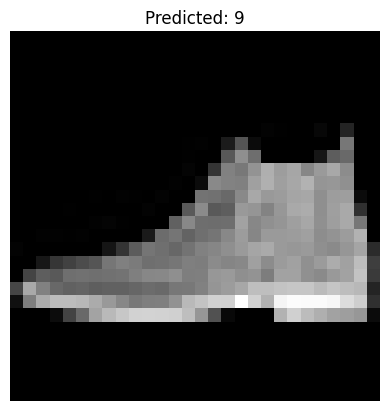

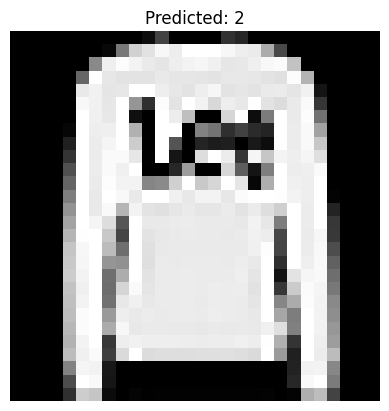

In [8]:
# Main execution
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_and_preprocess_data()

    if X_train is not None:
        model = build_model()
        train_model(model, X_train, y_train)
        evaluate_model(model, X_test, y_test)
        make_predictions(model, X_test)
